# Can you estimate the age of an abalone?

## 📖 Background
You are working as an intern for an abalone farming operation in Japan. For operational and environmental reasons, it is an important consideration to estimate the age of the abalones when they go to market. 

Determining an abalone's age involves counting the number of rings in a cross-section of the shell through a microscope. Since this method is somewhat cumbersome and complex, you are interested in helping the farmers estimate the age of the abalone using its physical characteristics.

## Guess How Old I am! </br>
![](abalone.ico)This analysis explains abalons physical features and age relationships and how to predict Abalons age. 

## Executive Summary
### How does weight change with age for each of the three sex categories?
Four weight features, 'whole_wt', 'shucked_wt', 'viscera_wt' and 'shell_wt' are in the dataset. They represent a whole weight, meat weight, gut weight and shell weight respectively. 

Distribution of Weights in male and female abalones vary across ages, while infant abalone shows a consistent weight increase as they get older.

All genders show a similar pattern up to the age of 10, where the age increases, and average weights increase. After that, the relationships between age and weights show a noisy pattern.



### Can you estimate an abalone's age using its physical characteristics? 
The 'rings' feature shows a perfect linear relationship with age, however, counting rings is a painstaking process and the problem to solve by this analysis is finding to predict abalone age.

The strongest correlation to age is the shell weight of 0.63. Other features show the similar correlation.

In this analysis, several linear regression models are created to predict abalons age.


3. Investigate which variables are better predictors of age for abalones.

<img src="2022-09-18.jpg" alt="abalone" />

In [1]:
# Import modules and the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

abalone = pd.read_csv('./data/abalone.csv')
abalone.head()

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


## Exploratory Data Analysis
### Basic Statistics
* The dataset contains 4177 rows and 10 columns without missing values
* The target variable, 'age' is slightly right skewed
* 'length' and 'diameter' are lightly left skewed
* 'The distribution of 'height' has a small standard deviation of 0.042
* 'whole_wt', 'shucked_wt', 'viscera_wt', and 'shell_wt' have a similar distribution of a light right skewed

In [2]:
# EDA 1
# Define a function to print basic stats
def get_basic_stats(df, name):
    print(f'--------<{name}>--------')
    print('\n----------------------------------------------------')
    print(f'{name} has {df.shape[0]} rows')
    print(f'{name} has {df.shape[1]} columns')
    print('\n----------------------------------------------------')
    print(df.info())
    print('\n----------------------------------------------------')
    print(df.describe(include='all'))
    print('\n')
    
dfs = [abalone]
names = ['abalone']  
for df, name in list(zip(dfs, names)):
    get_basic_stats(df, name)

--------<abalone>--------

----------------------------------------------------
abalone has 4177 rows
abalone has 10 columns

----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         4177 non-null   object 
 1   length      4177 non-null   float64
 2   diameter    4177 non-null   float64
 3   height      4177 non-null   float64
 4   whole_wt    4177 non-null   float64
 5   shucked_wt  4177 non-null   float64
 6   viscera_wt  4177 non-null   float64
 7   shell_wt    4177 non-null   float64
 8   rings       4177 non-null   int64  
 9   age         4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB
None

----------------------------------------------------
         sex       length     diameter       height     whole_wt   shucked_wt  \
count   4177  4177

In [3]:
# Check missing values
df.isnull().sum()

sex           0
length        0
diameter      0
height        0
whole_wt      0
shucked_wt    0
viscera_wt    0
shell_wt      0
rings         0
age           0
dtype: int64

## Distribution plots
### Show distribution for each feature

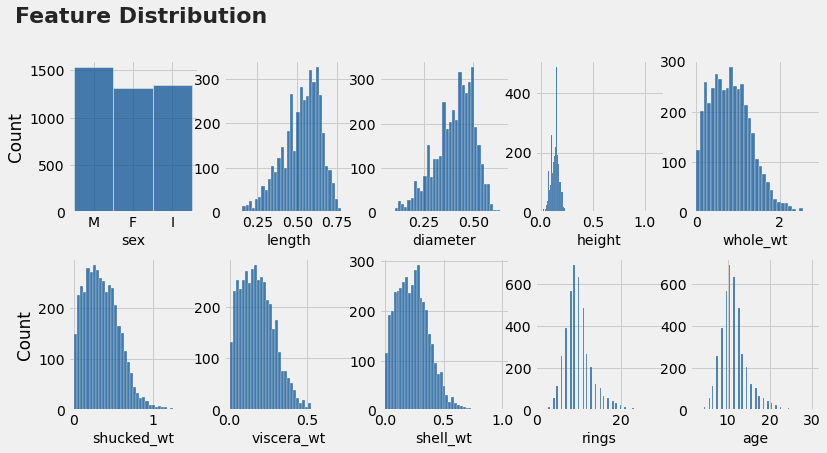

In [4]:
#EDA 2
# 2022/08/24 
# Check distribution 
i = 2
j = 5
r, c = 0, 0

plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(i, j, figsize=(12, 6))
plt.subplots_adjust(hspace=0.3)
axs[0][0].text(-2, 2000, "Feature Distribution", fontsize=22, weight='bold',color='#252525')
cols = abalone.columns
idx = 0
while r < i:
    while c < j:
        axs[r][c] = sns.histplot(abalone[cols[idx]], ax=axs[r][c], color='#0B5394')
        axs[r][c].set_xlabel(cols[idx], fontsize=14)
        if c != 0:
            axs[r][c].set_ylabel("");
        c += 1
        idx += 1
    r += 1
    c = 0

## Pair Plot
### Show the relationships between features along with the distribution for each sex

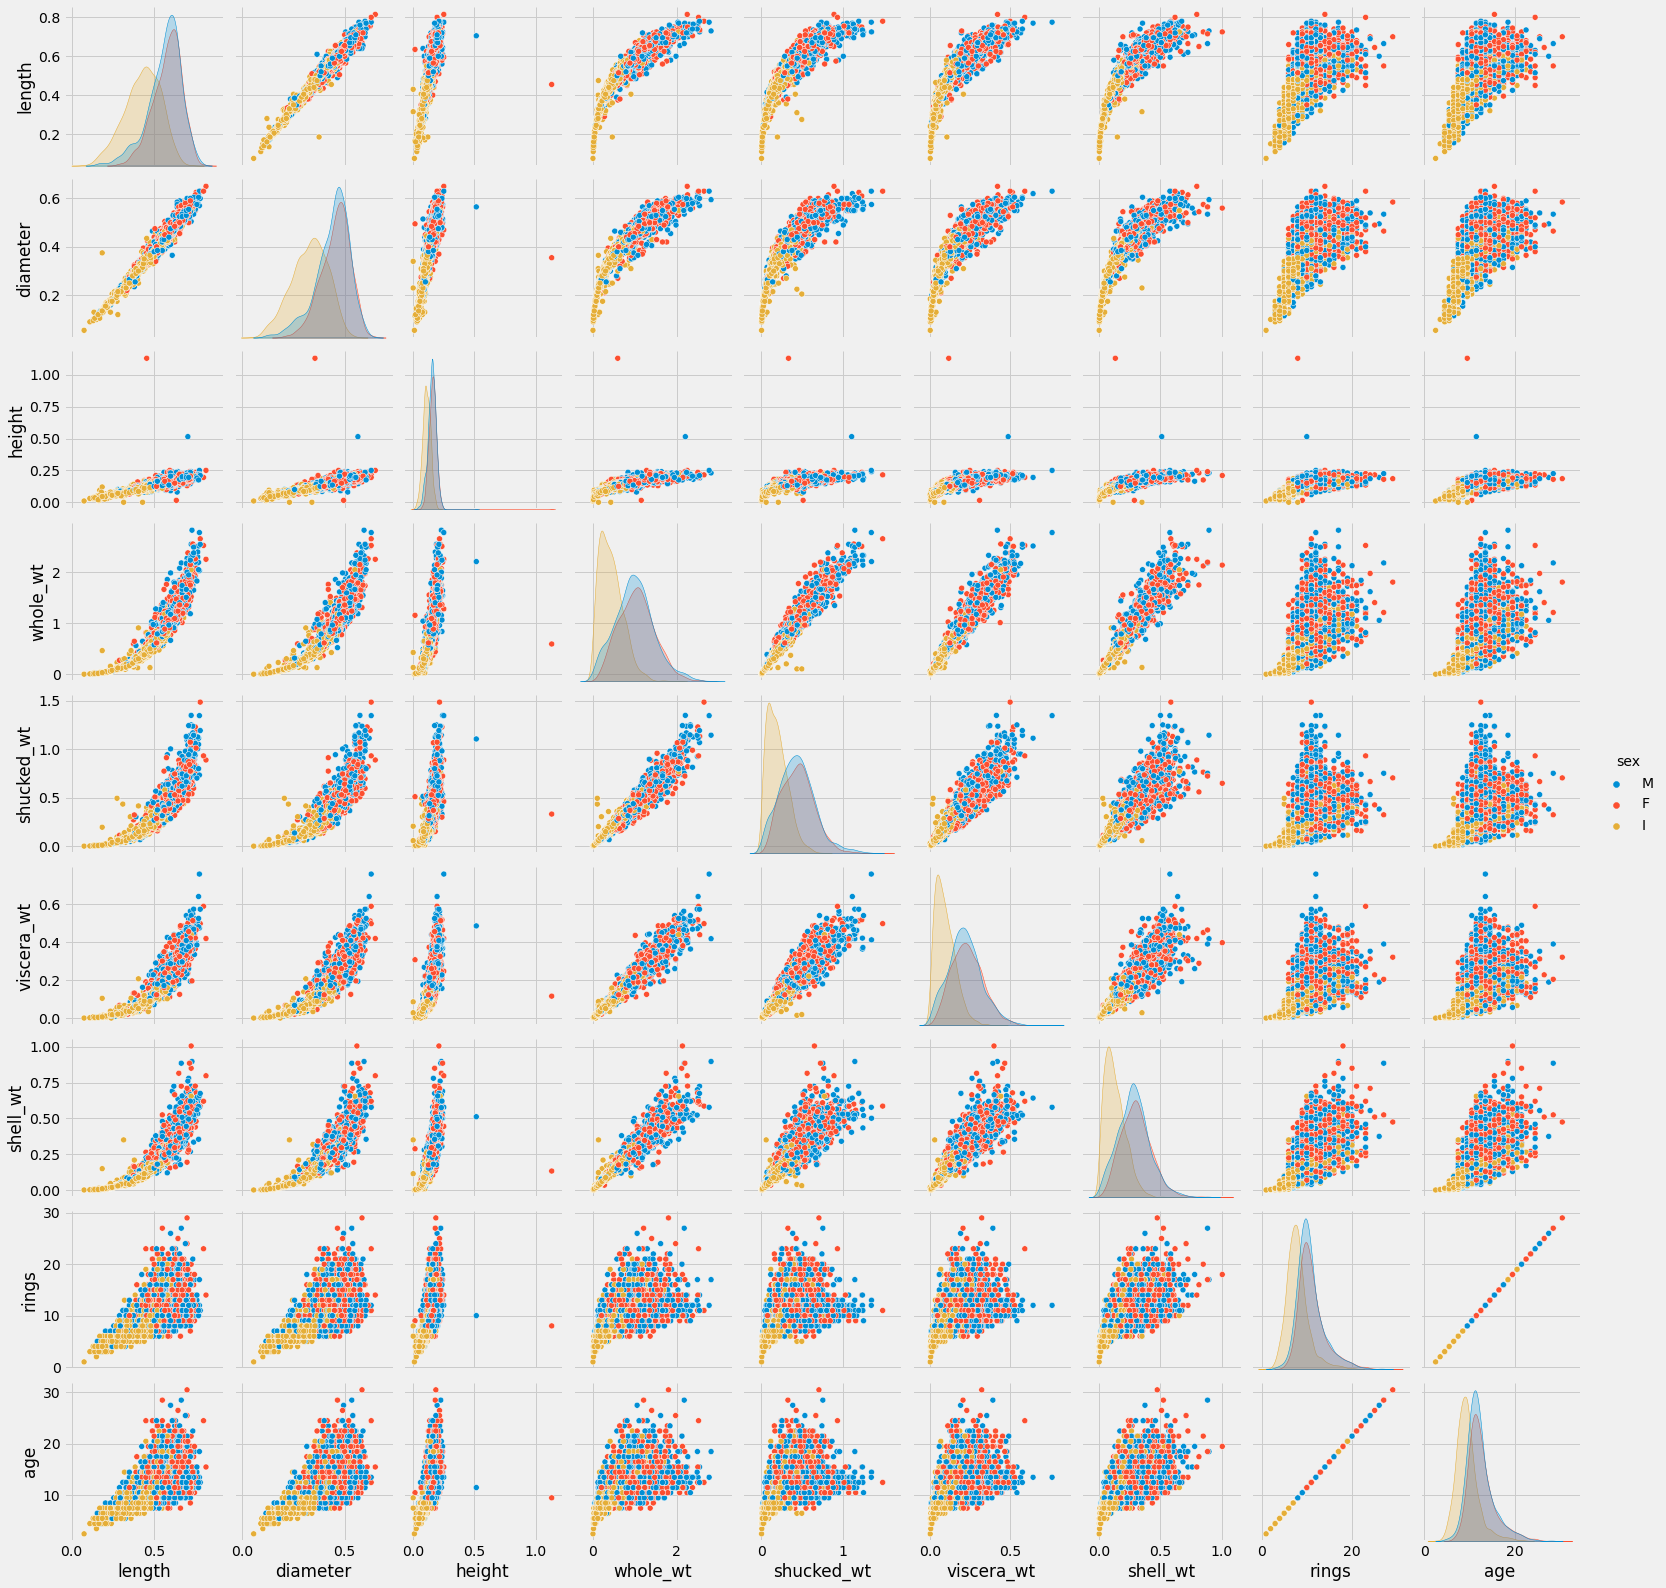

In [5]:
# EDA
# Draw pairplot
plt.style.use('fivethirtyeight')
#fig, ax = plt.subplots(figsize=(15, 15))
sns.pairplot(abalone, hue='sex');
#title(title='Pairplot');

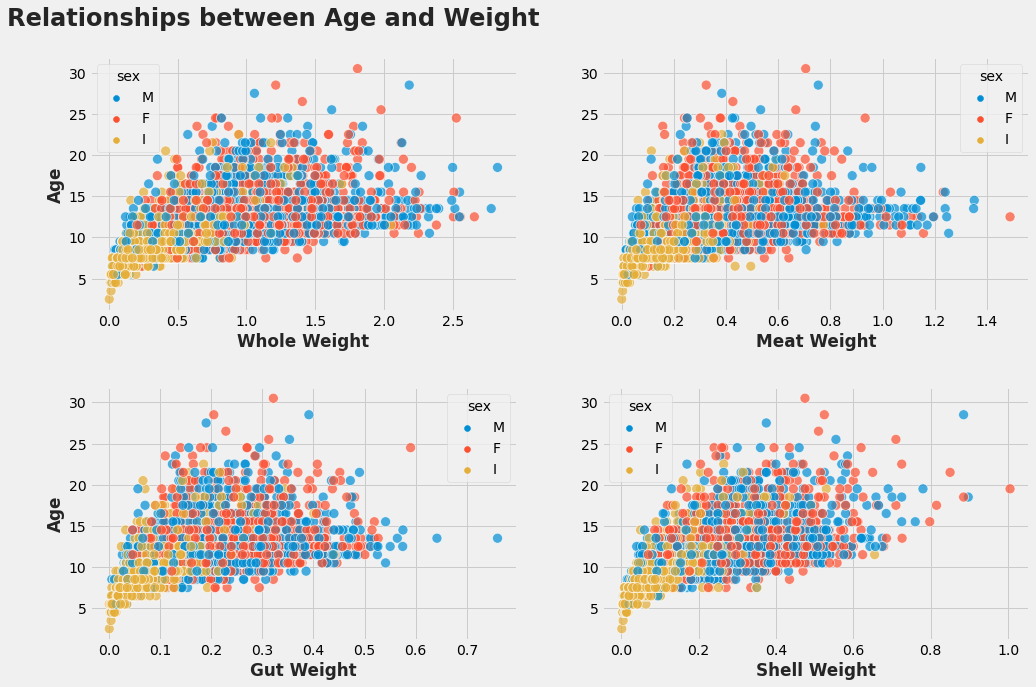

In [3]:
# Draw scatterplot
from cProfile import label


plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.3)
plt.suptitle("Relationships between Age and Weight", x=0.25, y=0.95, fontsize=24, weight='bold',color='#252525')

hue_order = ['M', 'F', 'I']
sex_label=['Male', 'Female', 'Infant']
# palette_colors = sns.set_palette(sns.color_palette(['008fd5', 'fc4f30', 'e5ae38']))
# palette_dict = {sex_label: s for s, color in zip(sex_label, palette_colors)}

sns.scatterplot(x='whole_wt', y='age', data=abalone, hue='sex', hue_order=hue_order, ax=axs[0][0], alpha=0.7, s=100)
sns.scatterplot(x='shucked_wt', y='age', data=abalone, hue='sex', hue_order=hue_order, ax=axs[0][1], alpha=0.7, s=100)
sns.scatterplot(x='viscera_wt', y='age', data=abalone, hue='sex', hue_order=hue_order, ax=axs[1][0], alpha=0.7, s=100)
sns.scatterplot(x='shell_wt', y='age', data=abalone, hue='sex', hue_order=hue_order, ax=axs[1][1], alpha=0.7, s=100)

axs[0][0].set_xlabel('Whole Weight', weight='bold',color='#252525')
axs[0][1].set_xlabel('Meat Weight', weight='bold',color='#252525')
axs[1][0].set_xlabel('Gut Weight', weight='bold',color='#252525')
axs[1][1].set_xlabel('Shell Weight', weight='bold',color='#252525')
axs[0][0].set_ylabel('Age', weight='bold',color='#252525')
axs[0][1].set_ylabel('')
axs[1][0].set_ylabel('Age', weight='bold',color='#252525')
axs[1][1].set_ylabel('');

# fig.legend(title='Sex', labels=['Male', 'Female', 'Infant'], bbox_to_anchor= (1, 1))
# # axs[0][0].legend(title='Sex', labels=['Male', 'Female', 'Infant'], bbox_to_anchor= (2, 1.3))
# # axs[0][1].legend(title='Sex', labels=['Female'], bbox_to_anchor= (2, 1.3))
# plt.legend();

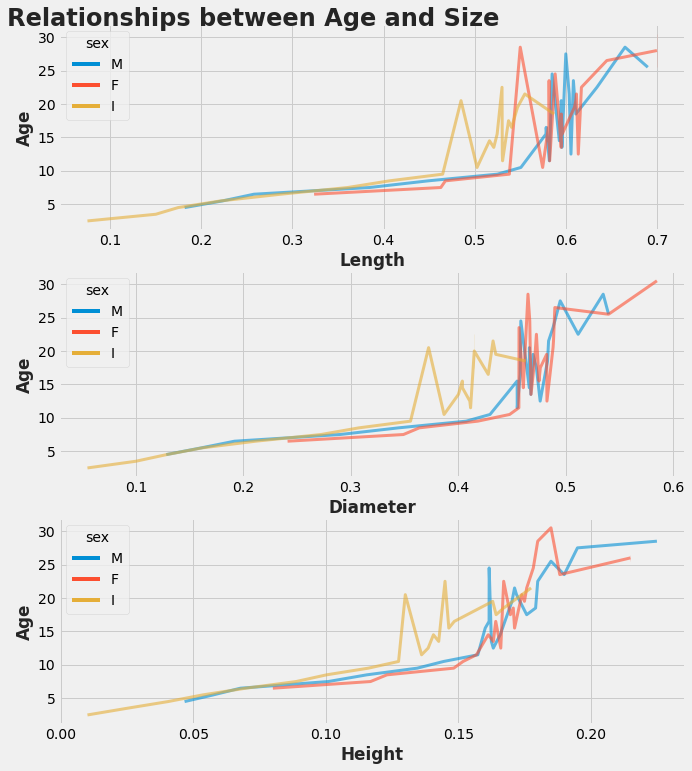

In [4]:
# Average weight by age and sex

abalone_groupby_age_sex = abalone.groupby(['age','sex'])['length', 'diameter', 'height', 'whole_wt', 'shucked_wt',
       'viscera_wt', 'shell_wt', 'rings'].mean().reset_index()
#abalone_groupby_age_sex.columns
#

# Draw lineplots
fig, (ax1, ax2, ax3) =plt.subplots(3, 1, figsize=(10,12))
plt.suptitle("Relationships between Age and Size", x=0.35, y=0.9, fontsize=24, weight='bold',color='#252525')


sns.lineplot(x='length', y='age', data=abalone_groupby_age_sex, hue='sex', hue_order=hue_order, lw=3, alpha=0.6, ax=ax1)
sns.lineplot(x='diameter', y='age', data=abalone_groupby_age_sex, hue='sex', hue_order=hue_order, lw=3, alpha=0.6, ax=ax2)
sns.lineplot(x='height', y='age', data=abalone_groupby_age_sex, hue='sex', hue_order=hue_order, lw=3, alpha=0.6, ax=ax3)

ax1.set_xlabel('Length', weight='bold',color='#252525')
ax2.set_xlabel('Diameter', weight='bold',color='#252525')
ax3.set_xlabel('Height', weight='bold',color='#252525')
ax1.set_ylabel('Age', weight='bold',color='#252525')
ax2.set_ylabel('Age', weight='bold',color='#252525')
ax3.set_ylabel('Age', weight='bold',color='#252525');

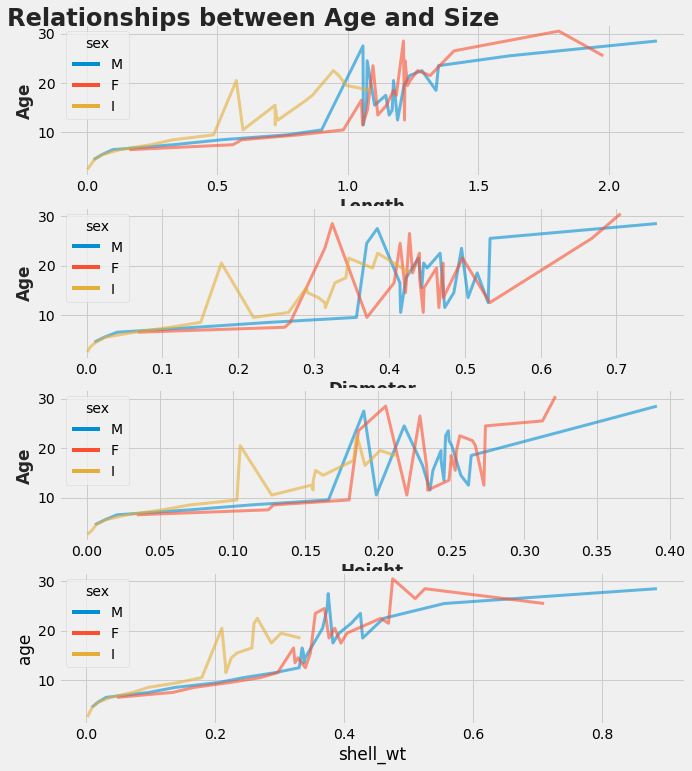

In [5]:
# Average weight by age and sex

abalone_groupby_age_sex = abalone.groupby(['age','sex'])['length', 'diameter', 'height', 'whole_wt', 'shucked_wt',
       'viscera_wt', 'shell_wt'].mean().reset_index()
#abalone_groupby_age_sex.columns
#

# Draw lineplots
fig, (ax1, ax2, ax3, ax4) =plt.subplots(4, 1, figsize=(10,12))
plt.suptitle("Relationships between Age and Size", x=0.35, y=0.9, fontsize=24, weight='bold',color='#252525')


sns.lineplot(x='whole_wt', y='age', data=abalone_groupby_age_sex, hue='sex', hue_order=hue_order, lw=3, alpha=0.6, ax=ax1)
sns.lineplot(x='shucked_wt', y='age', data=abalone_groupby_age_sex, hue='sex', hue_order=hue_order, lw=3, alpha=0.6, ax=ax2)
sns.lineplot(x='viscera_wt', y='age', data=abalone_groupby_age_sex, hue='sex', hue_order=hue_order, lw=3, alpha=0.6, ax=ax3)
sns.lineplot(x='shell_wt', y='age', data=abalone_groupby_age_sex, hue='sex', hue_order=hue_order, lw=3, alpha=0.6, ax=ax4)

ax1.set_xlabel('Length', weight='bold',color='#252525')
ax2.set_xlabel('Diameter', weight='bold',color='#252525')
ax3.set_xlabel('Height', weight='bold',color='#252525')
ax1.set_ylabel('Age', weight='bold',color='#252525')
ax2.set_ylabel('Age', weight='bold',color='#252525')
ax3.set_ylabel('Age', weight='bold',color='#252525');

## Outliers

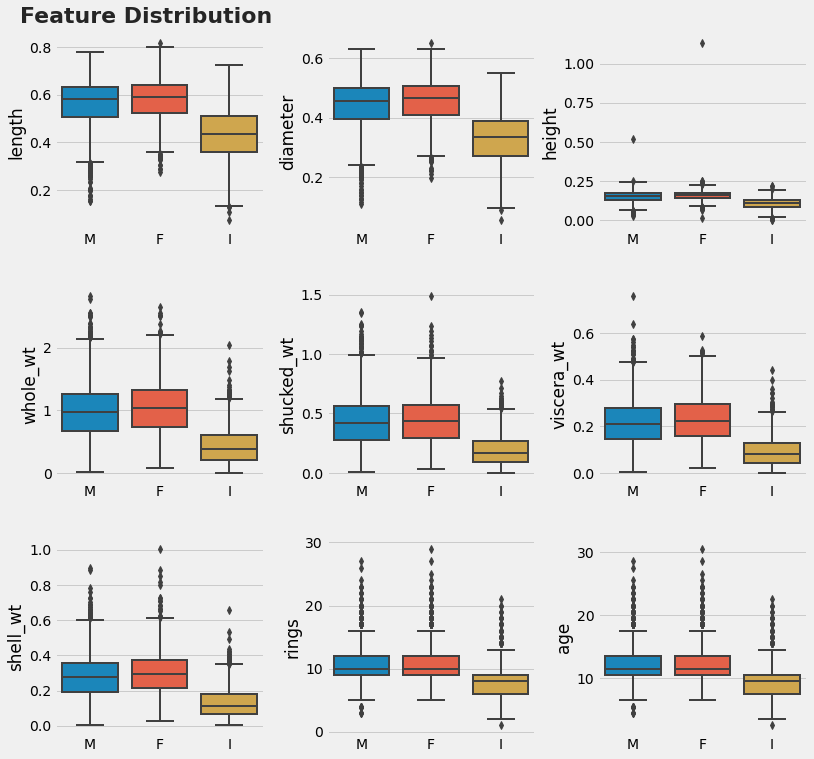

In [6]:
# Draw boxplots
# 'length', 'diameter', 'height', 'whole_wt', 'shucked_wt', 'viscera_wt', 'shell_wt', 'rings'

plt.style.use('fivethirtyeight')

i = 3
j = 3
r = c = 0

fig, axs = plt.subplots(i, j, figsize=(12, 12))
plt.subplots_adjust(hspace=0.3, wspace=0.3) 
axs[0][0].text(-1.0, 0.9, "Feature Distribution", fontsize=22, weight='bold',color='#252525')
cols = abalone.columns
r = c = 0
for col in cols:
    if col == 'sex':
        continue
    else:   
        if c >= i:
            c = 0
            r += 1
        sns.boxplot(x='sex', y=col, data=abalone, ax = axs[r][c], linewidth=2)
        axs[r][c].set_xlabel("")
        c += 1

In [15]:
# Define a function to return a list of indicater of outliers
# True --> outlier, False --> not outlier 
def get_outliers(my_list):
    outliers = []
    # Get 25% percentile and 75% percentile
    percentile_25 = np.percentile(my_list, 25)
    percentile_75 = np.percentile(my_list, 75)
    # Get Inter Quartile Range
    iqr = percentile_75 - percentile_25
    # Get outliers
    lower_outliers = percentile_25 - iqr * 1.5 
    upper_outliers = percentile_75 + iqr * 1.5
    # outliers
    outliers = ((lower_outliers > my_list) | (my_list > upper_outliers))
    return outliers

def get_ext_outliers(my_list):
    outliers = []
    # Get 25% percentile and 75% percentile
    percentile_25 = np.percentile(my_list, 25)
    percentile_75 = np.percentile(my_list, 75)
    # Get Inter Quartile Range
    iqr = percentile_75 - percentile_25
    # Get extreme outliers
    ext_lower_outliers = percentile_25 - iqr * 3 
    ext_upper_outliers = percentile_75 + iqr * 3
    # outliers
    ext_outliers = ((ext_lower_outliers > my_list) | (my_list > ext_upper_outliers))
    return ext_outliers


# Check outliers
for col in abalone.columns:
    if abalone[col].dtype != 'object':
        outliers = abalone[get_outliers(abalone[col])]
        #print("Outliers")
        print(f"Column {col} has {len(outliers)} outliers")
        #print("\nExtreme Outliers")

        ext_outliers = abalone[get_ext_outliers(abalone[col])]
        print(f"Column {col} has {len(ext_outliers)} extreme outliers")
        # print(outliers)

Column length has 49 outliers
Column length has 0 extreme outliers
Column diameter has 59 outliers
Column diameter has 0 extreme outliers
Column height has 29 outliers
Column height has 2 extreme outliers
Column whole_wt has 30 outliers
Column whole_wt has 0 extreme outliers
Column shucked_wt has 48 outliers
Column shucked_wt has 1 extreme outliers
Column viscera_wt has 26 outliers
Column viscera_wt has 1 extreme outliers
Column shell_wt has 35 outliers
Column shell_wt has 1 extreme outliers
Column rings has 278 outliers
Column rings has 36 extreme outliers
Column age has 278 outliers
Column age has 36 extreme outliers


In [ ]:
# Remove extreme outliers and check the distribution


# Draw boxplots
# 'length', 'diameter', 'height', 'whole_wt', 'shucked_wt', 'viscera_wt', 'shell_wt', 'rings'

plt.style.use('fivethirtyeight')

i = 3
j = 3
r = c = 0

fig, axs = plt.subplots(i, j, figsize=(12, 12))
plt.subplots_adjust(hspace=0.3, wspace=0.3) 
axs[0][0].text(-1.0, 0.9, "Feature Distribution", fontsize=22, weight='bold',color='#252525')
cols = abalone.columns
r = c = 0
for col in cols:
    if col == 'sex':
        continue
    else:   
        if c >= i:
            c = 0
            r += 1
        sns.boxplot(x='sex', y=col, data=abalone, ax = axs[r][c], linewidth=2)
        axs[r][c].set_xlabel("")
        c += 1

## MinMax Scaler instead of Log Transformation
* 'height' has a low standard deviation
* To redule a weight, adjust a scale to between 0 and 1 using MinMaxScaler

In [22]:
# MinMax scale
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
minmax_abalone = abalone.copy()

cols = ['length', 'diameter', 'height', 'whole_wt', 'shucked_wt', 'viscera_wt', 'shell_wt']
minmax_abalone.drop(['age', 'rings', 'sex'], axis=1, inplace=True)
minmax_abalone_ndarray = scaler.fit_transform(minmax_abalone)

# numpy ndarray minmax_abalone_ndarray
minmax_abalone = pd.DataFrame(minmax_abalone_ndarray, columns=cols)
minmax_abalone['sex', 'age'] = abalone['sex', 'age']


## Log Transformation
* All numerical features  have outliers
* Many features show a polynomial regression pattern

In [30]:
# Log transform numerical features
log_abalone = pd.DataFrame()
for col in abalone.columns:
    if col in ['sex', 'age']:
        log_abalone[col] = abalone[col]
    else:
        log_abalone[col] = np.log(abalone[col]+1)

# Drop 'rings'
log_abalone.drop('rings', axis=1, inplace=True)

log_abalone.describe()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.418092,0.339511,0.129960,0.567901,0.294220,0.161815,0.208030,11.433684
std,0.081463,0.072457,0.035606,0.268329,0.158794,0.091183,0.110190,3.224169
min,0.072321,0.053541,0.000000,0.001998,0.001000,0.000500,0.001499,2.500000
25%,0.371564,0.300105,0.108854,0.365684,0.170586,0.089384,0.122218,9.500000
50%,0.435024,0.354172,0.131028,0.587509,0.289680,0.157858,0.210261,10.500000
75%,0.479335,0.392042,0.152721,0.766862,0.406798,0.225541,0.284427,12.500000
max,0.596085,0.500775,0.756122,1.341689,0.911479,0.565314,0.695644,30.500000


* 'rings' and 'age' have a perfect correlation
* 'length', 'diameter', and 'height' are positive correlation
* 'whole_wt', 'shucked_wt', 'viscera_wt', and 'shell_wt' are positive correlation

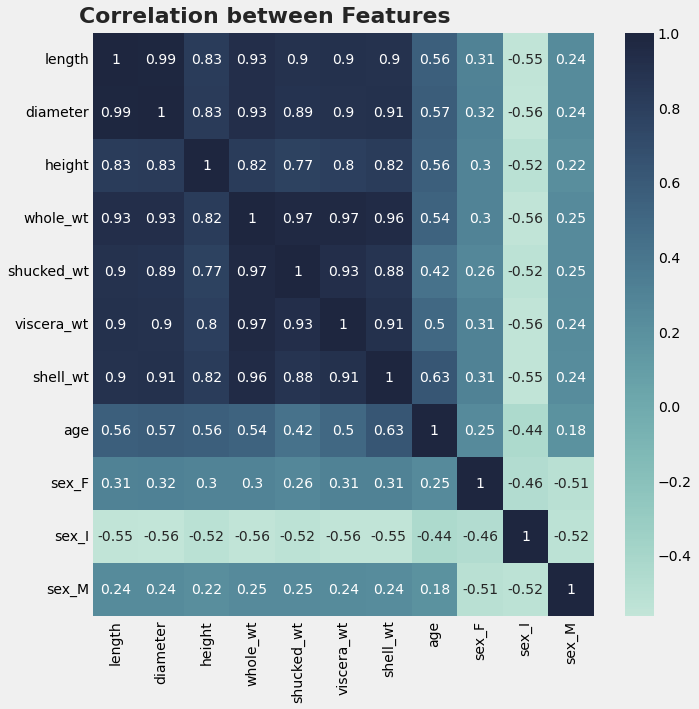

In [34]:
# No Log Transformation
# Heatmap

# Convert the column 'sex' from categorical to numerical variables
ohe_abalone = pd.get_dummies(abalone, columns=['sex'], prefix='sex')

# Drop 'rings'
ohe_abalone.drop('rings', axis=1, inplace=True)

correlation = ohe_minmax_abalone.corr()

plt.style.use('fivethirtyeight')
fig, ax =plt.subplots(figsize=(10,10))
ax.text(-.3, 0-.2, "Correlation between Features", fontsize=22, weight='bold',color='#252525')

palette = sns.color_palette("ch:start=0,rot=-.3", as_cmap=True)
sns.heatmap(correlation, annot=True, cmap=palette);

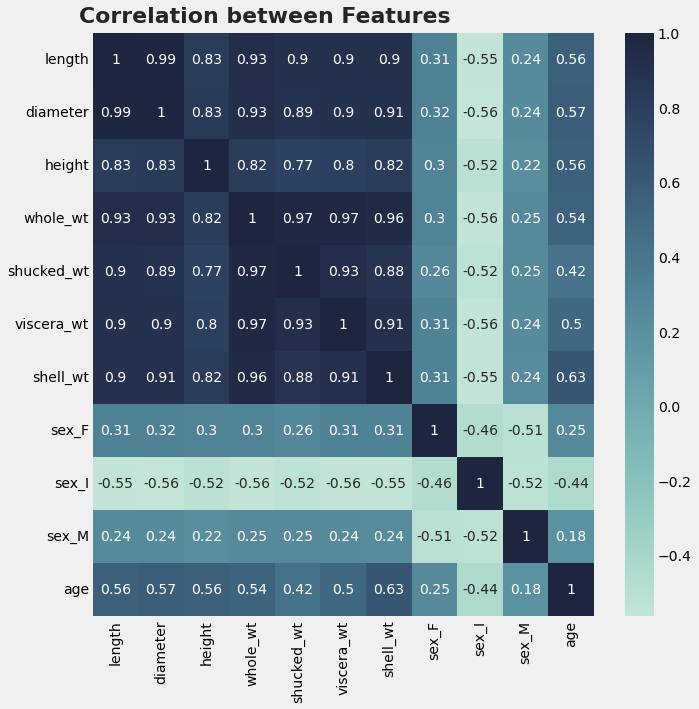

In [26]:
# MinMax Transformation
# Heatmap
# Convert the column 'sex' from categorical to numerical variables
ohe_minmax_abalone = pd.get_dummies(minmax_abalone, columns=['sex'], prefix='sex')
ohe_minmax_abalone['age'] = abalone['age']

correlation = ohe_minmax_abalone.corr()

plt.style.use('fivethirtyeight')
fig, ax =plt.subplots(figsize=(10,10))
ax.text(-.3, 0-.2, "Correlation between Features", fontsize=22, weight='bold',color='#252525')

palette = sns.color_palette("ch:start=0,rot=-.3", as_cmap=True)
sns.heatmap(correlation, annot=True, cmap=palette);

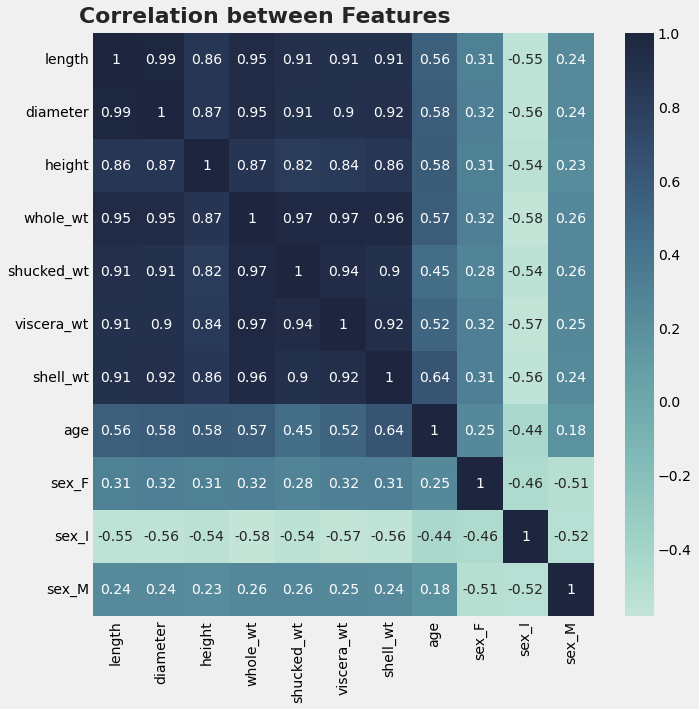

In [31]:
# Log Transformation
# Heatmap

# Convert the column 'sex' from categorical to numerical variables
ohe_log_abalone = pd.get_dummies(log_abalone, columns=['sex'], prefix='sex')

correlation = ohe_log_abalone.corr()

plt.style.use('fivethirtyeight')
fig, ax =plt.subplots(figsize=(10,10))
ax.text(-.3, 0-.2, "Correlation between Features", fontsize=22, weight='bold',color='#252525')

palette = sns.color_palette("ch:start=0,rot=-.3", as_cmap=True)
sns.heatmap(correlation, annot=True, cmap=palette);

### 'rings' and 'age' are in a perfect correlation relationship
### 'shell_wt' and 'diameter' have next highest correlation coefficient values to 'rings'

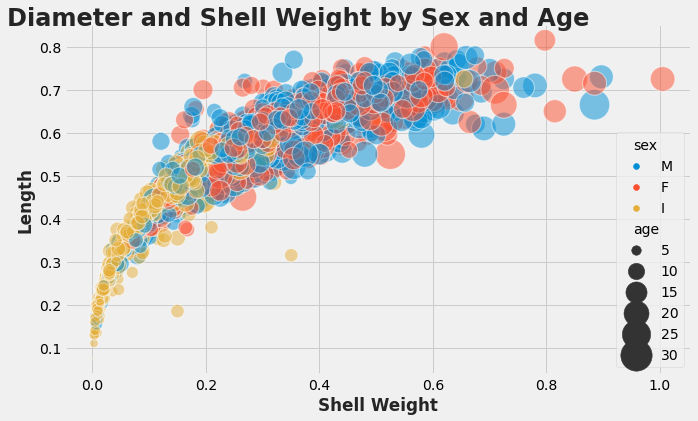

In [15]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10, 6))

ax.text(-.15, 0.85, "Diameter and Shell Weight by Sex and Age", fontsize=24, weight='bold',color='#252525')

sns.scatterplot(x='shell_wt', y='length', data=abalone, size='age', sizes=(2, 1000), hue='sex', alpha=.5)
ax.set_xlabel('Shell Weight', weight='bold',color='#252525')
ax.set_ylabel('Length', weight='bold',color='#252525');

### Model
* Create a linear model

## Linear Regression Model
* ohe_minmax_abalone and ohe_log_abalone

In [36]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create X and y
X = ohe_abalone.drop('age', axis=1)
y = ohe_abalone['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

# Linear Regression model
mse_lr = LinearRegression()
mse_lr.fit(X_train, y_train)
y_pred_lr = mse_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
print("-------- Linear Regression --------")
print(f'Mean Squared Error: {round(mse_lr, 2)}')
print(f'Root Mean Squared Error: {round(rmse_lr, 2)}')

# Lasso Linear Regressionmodel
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso =lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
print("---------------- Lasso ------------")
print(f'Mean Squared Error: {round(mse_lasso, 2)}')
print(f'Root Mean Squared Error: {round(rmse_lasso, 2)}')

# OLS Linear Regression model
olsmodel = sm.OLS(y_train, X_train)
results = olsmodel.fit()
y_pred_ols = results.predict(X_test)

mse_ols = mean_squared_error(y_test, y_pred_ols)
rmse_ols = np.sqrt(mse_ols)
print("---------------- OLS --------------")
print(f'Mean Squared Error: {round(mse_ols, 2)}')
print(f'Root Mean Squared Error: {round(rmse_ols, 2)}')
print(results.summary())

-------- Linear Regression --------
Mean Squared Error: 5.45
Root Mean Squared Error: 2.33
---------------- Lasso ------------
Mean Squared Error: 10.63
Root Mean Squared Error: 3.26
---------------- OLS --------------
Mean Squared Error: 5.45
Root Mean Squared Error: 2.33
                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     386.9
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:09:30   Log-Likelihood:                -6406.2
No. Observations:                2923   AIC:                         1.283e+04
Df Residuals:                    2913   BIC:                         1.289e+04
Df Model:                           9                                         
Covariance Type

In [39]:
X_train.describe()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,sex_F,sex_I,sex_M
count,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000
mean,0.605797,0.591840,0.123325,0.293497,0.241541,0.237303,0.236801,0.302087,0.322956,0.374957
std,0.163926,0.168296,0.034571,0.175718,0.150484,0.145302,0.140653,0.459241,0.467686,0.484195
min,0.047297,0.058824,0.022124,0.002125,0.001009,0.001975,0.001495,0.000000,0.000000,0.000000
25%,0.506757,0.487395,0.101770,0.154595,0.122562,0.120145,0.124315,0.000000,0.000000,0.000000
50%,0.635135,0.621849,0.123894,0.284399,0.226295,0.225148,0.232686,0.000000,0.000000,0.000000
75%,0.729730,0.714286,0.148230,0.410041,0.339778,0.333772,0.327354,1.000000,1.000000,1.000000
max,1.000000,1.000000,0.221239,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
# MinMax Transformation

# Create X and y
X = ohe_minmax_abalone.drop('age', axis=1)
y = ohe_minmax_abalone['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

# Linear Regression model
mse_lr = LinearRegression()
mse_lr.fit(X_train, y_train)
y_pred_lr = mse_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
print("-------- Linear Regression --------")
print(f'Mean Squared Error: {round(mse_lr, 2)}')
print(f'Root Mean Squared Error: {round(rmse_lr, 2)}')

# Lasso Linear Regressionmodel
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso =lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
print("---------------- Lasso ------------")
print(f'Mean Squared Error: {round(mse_lasso, 2)}')
print(f'Root Mean Squared Error: {round(rmse_lasso, 2)}')

# OLS Linear Regression model
olsmodel = sm.OLS(y_train, X_train)
results = olsmodel.fit()
y_pred_ols = results.predict(X_test)

mse_ols = mean_squared_error(y_test, y_pred_ols)
rmse_ols = np.sqrt(mse_ols)
print("---------------- OLS --------------")
print(f'Mean Squared Error: {round(mse_ols, 2)}')
print(f'Root Mean Squared Error: {round(rmse_ols, 2)}')
print(results.summary())

-------- Linear Regression --------
Mean Squared Error: 5.45
Root Mean Squared Error: 2.33
---------------- Lasso ------------
Mean Squared Error: 10.63
Root Mean Squared Error: 3.26
---------------- OLS --------------
Mean Squared Error: 5.45
Root Mean Squared Error: 2.33
                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     386.9
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:20:19   Log-Likelihood:                -6406.2
No. Observations:                2923   AIC:                         1.283e+04
Df Residuals:                    2913   BIC:                         1.289e+04
Df Model:                           9                                         
Covariance Type

[12.87297041 15.5202807   7.60289823 ...  8.53181446  8.77760961
 13.9287017 ]


<AxesSubplot:xlabel='height', ylabel='age'>

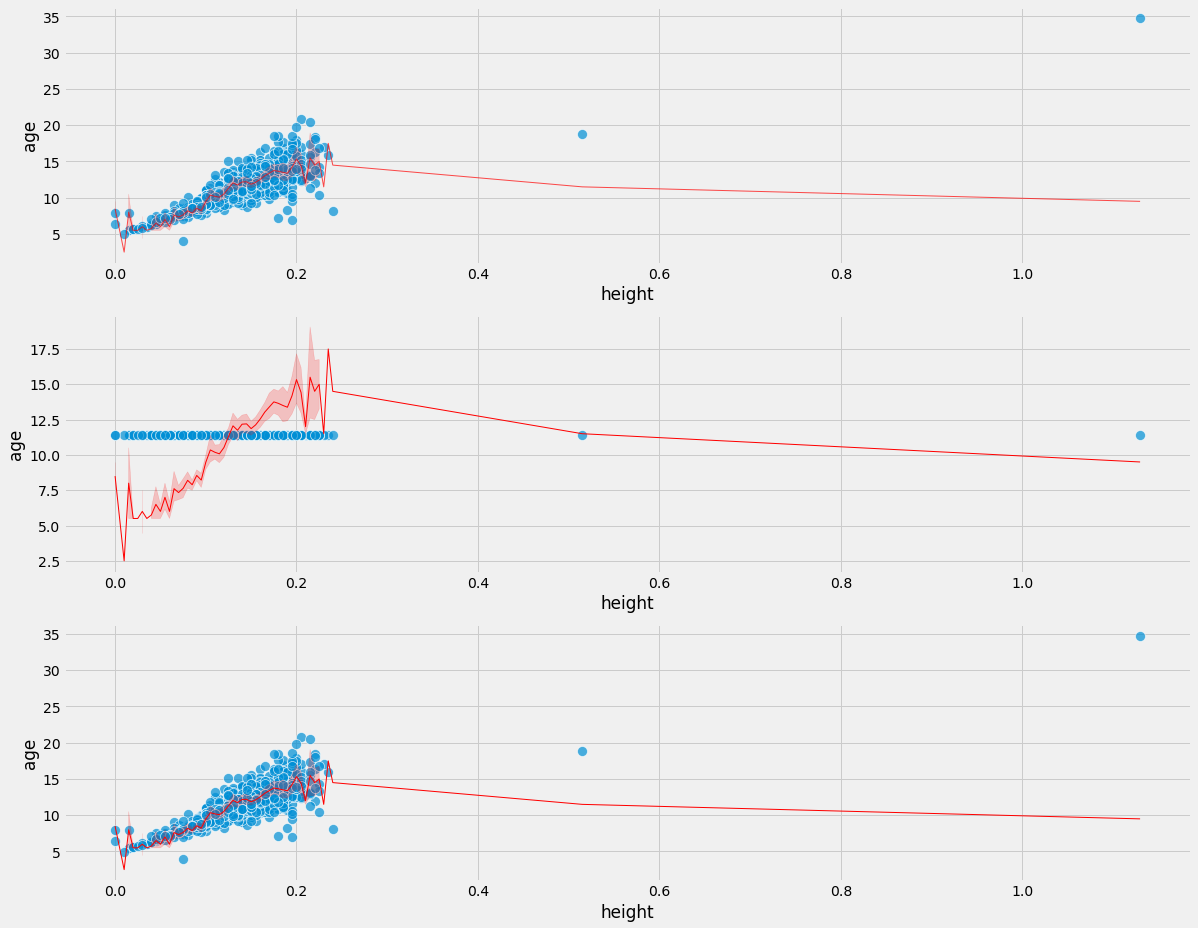

In [62]:
# Visualize the accuracy of the linear regression model 
print(y_pred_lr)


fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18, 15))

sns.scatterplot(X_test['height'], y_pred_lr, ax=ax1, alpha=0.7, s=100)
sns.scatterplot(X_test['height'], y_pred_lasso, hue_order=hue_order, ax=ax2, alpha=0.7, s=100)
sns.scatterplot(X_test['height'], y_pred_ols, hue_order=hue_order, ax=ax3, alpha=0.7, s=100)

sns.lineplot(X_test['height'], y_test, color='r', ax=ax1, lw=1, alpha=0.7)
sns.lineplot(X_test['height'], y_test, color='r', ax=ax2, lw=1)
sns.lineplot(X_test['height'], y_test, color='r', ax=ax3, lw=1)

In [37]:
# Log-scaled Dataset
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create X and y
X = ohe_log_abalone.drop('age', axis=1)
y = ohe_log_abalone['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

# Linear Regression model
log_mse_lr = LinearRegression()
log_mse_lr.fit(X_train, y_train)
log_y_pred_lr = log_mse_lr.predict(X_test)

log_mse_lr = mean_squared_error(y_test, y_pred_lr)
log_rmse_lr = np.sqrt(log_mse_lr)
print("-------- Linear Regression --------")
print(f'Mean Squared Error: {round(log_mse_lr, 2)}')
print(f'Root Mean Squared Error: {round(log_rmse_lr, 2)}')

# Lasso Linear Regressionmodel
from sklearn.linear_model import Lasso
log_lasso = Lasso(normalize=True)
log_lasso.fit(X_train, y_train)
log_y_pred_lasso =lasso.predict(X_test)

log_mse_lasso = mean_squared_error(y_test, log_y_pred_lasso)
log_rmse_lasso = np.sqrt(log_mse_lasso)
print("---------------- Lasso ------------")
print(f'Mean Squared Error: {round(log_mse_lasso, 2)}')
print(f'Root Mean Squared Error: {round(log_rmse_lasso, 2)}')

# OLS Linear Regression model
log_olsmodel = sm.OLS(y_train, X_train)
result = log_olsmodel.fit()
log_y_pred_ols = results.predict(X_test)

log_mse_ols = mean_squared_error(y_test, log_y_pred_ols)
log_rmse_ols = np.sqrt(log_mse_ols)
print("---------------- OLS --------------")
print(f'Mean Squared Error: {round(log_mse_ols, 2)}')
print(f'Root Mean Squared Error: {round(log_rmse_ols, 2)}')
print(results.summary())


-------- Linear Regression --------
Mean Squared Error: 83.92
Root Mean Squared Error: 9.16
---------------- Lasso ------------
Mean Squared Error: 79.03
Root Mean Squared Error: 8.89
---------------- OLS --------------
Mean Squared Error: 51.64
Root Mean Squared Error: 7.19
                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     386.9
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:59:27   Log-Likelihood:                -6406.2
No. Observations:                2923   AIC:                         1.283e+04
Df Residuals:                    2913   BIC:                         1.289e+04
Df Model:                           9                                         
Covariance Ty

[12.87297041 15.5202807   7.60289823 ...  8.53181446  8.77760961
 13.9287017 ]


<AxesSubplot:xlabel='shucked_wt', ylabel='age'>

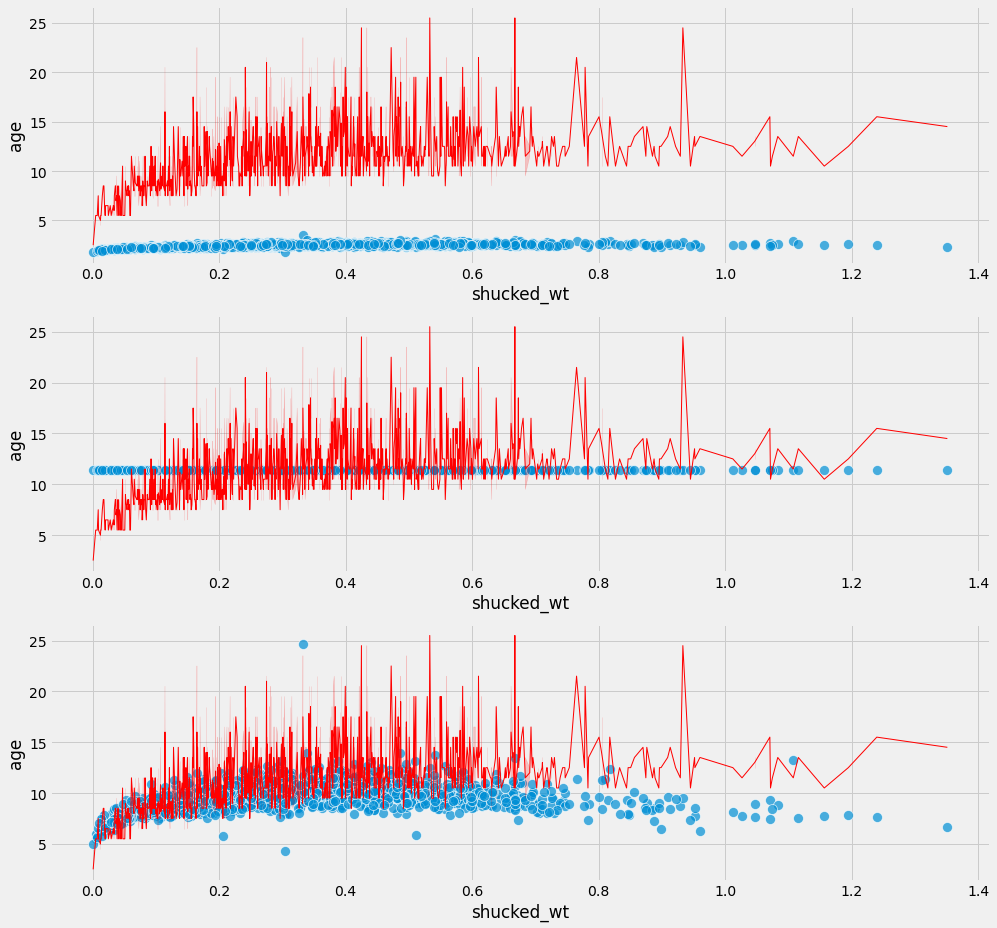

In [56]:
# Visualize the accuracy of the linear regression model 
print(y_pred_lr)


fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 15))

sns.scatterplot(X_test['shucked_wt'], log_y_pred_lr, ax=ax1, alpha=0.7, s=100)
sns.scatterplot(X_test['shucked_wt'], log_y_pred_lasso, hue_order=hue_order, ax=ax2, alpha=0.7, s=100)
sns.scatterplot(X_test['shucked_wt'], log_y_pred_ols, hue_order=hue_order, ax=ax3, alpha=0.7, s=100)

sns.lineplot(X_test['shucked_wt'], y_test, color='r', ax=ax1, lw=1)
sns.lineplot(X_test['shucked_wt'], y_test, color='r', ax=ax2, lw=1)
sns.lineplot(X_test['shucked_wt'], y_test, color='r', ax=ax3, lw=1)

In [ ]:
# Homoscedasticity Is this a really linear model?
print(y_test-y_pred)


999     0.074316
192    -0.006016
3523    0.277058
857     0.708792
861     0.612716
          ...   
3837    1.034396
1082    0.095545
1329    0.116552
648     0.260414
66     -0.174992
Length: 2924, dtype: float64


In [ ]:
mse = 1/len(y_pred) * sum(y_pred - y_test)**2
mse

2.3583017698717126e-25

In [ ]:
ohe_log_abalone['height'].isna().sum()

0

## 💪 Competition challenge
Create a report that covers the following:

1. How does weight change with age for each of the three sex categories?
2. Can you estimate an abalone's age using its physical characteristics? 
3. Investigate which variables are better predictors of age for abalones.

## 🧑‍⚖️ Judging criteria

This is a community-based competition. The top 5 most upvoted entries will win.

The winners will receive DataCamp merchandise.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!